In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('alaskan-earthquakes.csv')
df.head()

,magnitudes,infos,depths
0,3.6,"August 23, 2025 08:23 AM\r\n41 miles ENE of Po...",89 miles
1,3.5,"August 22, 2025 03:03 PM\r\n73 miles S of Sand...",14 miles
2,3.3,"August 21, 2025 10:20 PM\r\n24 miles SE of Bur...",2 miles
3,3.7,"August 21, 2025 04:18 PM\r\n26 miles SSE of Am...",13 miles
4,4.1,"August 20, 2025 12:35 PM\r\n12 miles NNW of Ne...",8 miles


In [4]:
# The "depths" column in this csv is made up of strings, but we want the miles as floats
numeric_depths = []

df = pd.read_csv('alaskan-earthquakes.csv')

for i in range(len(df['depths'])):
    split_depth = df['depths'][i].split(" ")
    num = float(split_depth[0])
    numeric_depths.append(num)

df["depths"] = numeric_depths

df.head()

,magnitudes,infos,depths
0,3.6,"August 23, 2025 08:23 AM\r\n41 miles ENE of Po...",89.0
1,3.5,"August 22, 2025 03:03 PM\r\n73 miles S of Sand...",14.0
2,3.3,"August 21, 2025 10:20 PM\r\n24 miles SE of Bur...",2.0
3,3.7,"August 21, 2025 04:18 PM\r\n26 miles SSE of Am...",13.0
4,4.1,"August 20, 2025 12:35 PM\r\n12 miles NNW of Ne...",8.0


In [5]:
# Now, we can see that the data about when and where the earthquakes happened is mixed into one column - so we will separate this

dates = []
locations = []

for i in range(len(df['infos'])):
    split_info = df['infos'][i].split("\r\n")
    date = split_info[0]
    location = split_info[1]
    #print("DATE: ", date)
    #print("LOCATION: ", location)
    dates.append(date)
    locations.append(location)

df['infos'] = dates
df = df.rename(columns={df.columns[1]: 'dates'})
df['locations'] = locations

df.head()

,magnitudes,dates,depths,locations
0,3.6,"August 23, 2025 08:23 AM",89.0,41 miles ENE of Port Alsworth
1,3.5,"August 22, 2025 03:03 PM",14.0,73 miles S of Sand Point
2,3.3,"August 21, 2025 10:20 PM",2.0,24 miles SE of Burwash Landing
3,3.7,"August 21, 2025 04:18 PM",13.0,26 miles SSE of Amchitka
4,4.1,"August 20, 2025 12:35 PM",8.0,12 miles NNW of Nenana


In [6]:
# lastly, we want to take the time and date information, and change it from a string into a datetime object - this will allow us to do things like sort most to lesat recent

new_dates=[]

for i in range(len(df['dates'])):
    new_date = datetime.strptime(df['dates'][i], '%B %d, %Y %H:%M %p')
    new_dates.append(new_date)

df['dates'] = new_dates

df.head()

,magnitudes,dates,depths,locations
0,3.6,2025-08-23 08:23:00,89.0,41 miles ENE of Port Alsworth
1,3.5,2025-08-22 03:03:00,14.0,73 miles S of Sand Point
2,3.3,2025-08-21 10:20:00,2.0,24 miles SE of Burwash Landing
3,3.7,2025-08-21 04:18:00,13.0,26 miles SSE of Amchitka
4,4.1,2025-08-20 12:35:00,8.0,12 miles NNW of Nenana


In [7]:
df.describe(include='all')

,magnitudes,dates,depths,locations
count,4866.000000,4866,4866.000000,4866
unique,NaN,NaN,NaN,3418
top,NaN,NaN,NaN,78 miles W of Adak
freq,NaN,NaN,NaN,25
mean,4.026552,2020-10-20 11:05:15.104808960,13.861282,NaN
min,0.500000,2014-01-02 14:02:00,0.000000,NaN
25%,3.600000,2018-08-12 15:30:00,0.000000,NaN
50%,3.900000,2021-05-20 06:05:00,7.000000,NaN
75%,4.300000,2023-07-01 03:35:45,17.000000,NaN
max,8.200000,2025-08-23 08:23:00,179.000000,NaN


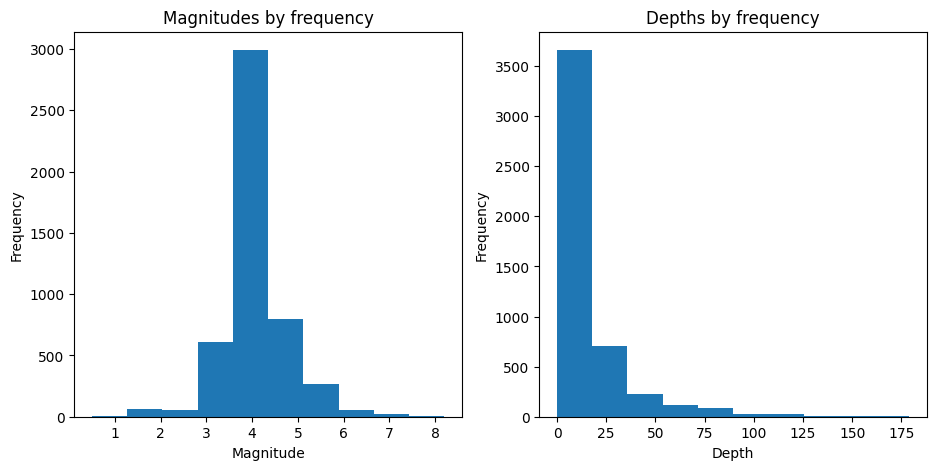

In [44]:
plt.figure(figsize=(11,5))

plt.subplot(1, 2, 1)
plt.hist(df['magnitudes'])
plt.title('Magnitudes by frequency')
plt.ylabel('Frequency')
plt.xlabel('Magnitude')

plt.subplot(1, 2, 2)
plt.hist(df['depths'])
plt.title('Depths by frequency')
plt.ylabel('Frequency')
plt.xlabel('Depth')

plt.show()

# This will give us a brief visualization of our magnitude and depths data 
# It looks like the depths data might need a closer look to get a better idea of what's going on
    # Our depths data has a lot of "0" values in it, which come from pre-2018 data where the depths may not have been recorded
    # In addition, the range is quite large, but there doesn't seem to be too much data after about 75 - 100 miles
    # Let's zoom in on some of the depths data and restrict the x-limits to get a better representation of the data

Text(0.5, 0, 'Depth')

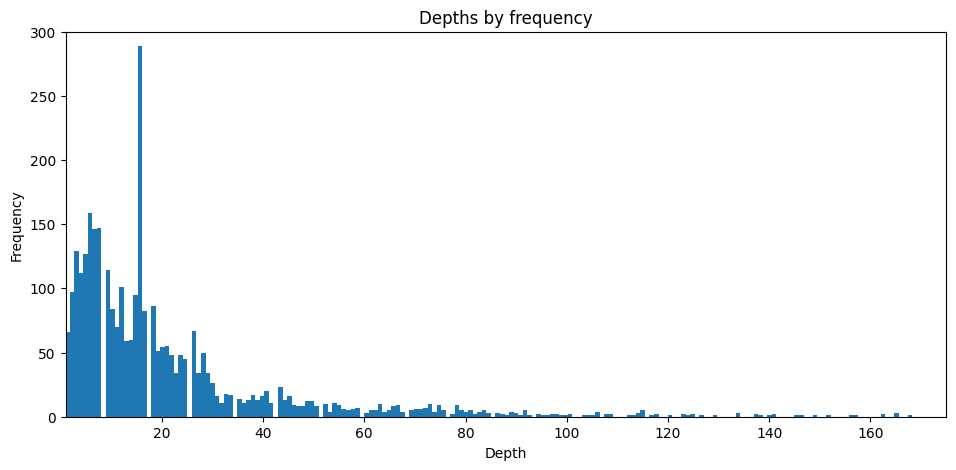

In [75]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 2)
plt.hist(df['depths'], bins=200)
plt.xlim(1, 175)
plt.ylim(0, 300)
plt.title('Depths by frequency')
plt.ylabel('Frequency')
plt.xlabel('Depth')

# by cutting out some of the higher numbers from the previous chart, and the 0's (which we'll have to deal with later, as some of the earthquakes actually did happen at 0 miles underground) we can get a better picture of the data
# it looks like even without the 0s, at least half of the data is still hovering below 20 miles
# there's a big spike in data around the 17 mile mark, which is significantly higher than any other data point
# because the no-data-0s from before 2018 make up such a big chunk of the data, we will probably only be able to compare depths from the last 7 years, not 10, as we will do for the magnitudes